
### [LINK TO DATASET]((https://www.kaggle.com/c/titanic/data?select=train.csv)###

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cd'/content/drive/MyDrive/ColabNotebooks/TITANIC'

/content/drive/MyDrive/ColabNotebooks/TITANIC


In [10]:
import numpy as np
import pandas as pd

In [11]:
df=pd.DataFrame(pd.read_csv('train.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 12)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

drop column  which NaN value is more than 35% of total value in that column.

In [14]:
drop_col=df.isnull().sum()[df.isnull().sum()>(35/100 *df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [15]:
drop_col.index

Index(['Cabin'], dtype='object')

In [16]:
df.drop(drop_col.index,axis=1,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [17]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
df['Embarked'].fillna('S',inplace=True)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [22]:
df['FamilySize']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


In [23]:
df['Alone']=[0 if  df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [24]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [25]:
df[['Alone','Fare']].corr()

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


In [26]:
df['Sex']=[0 if df['Sex'][i]=='male' else 1 for i in df.index]

In [27]:
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [28]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

###VISUALIZATION###

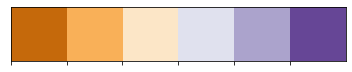

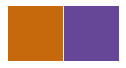

In [29]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [32]:
print(f'''There are {len(df.columns)} columns in the dataframe mathData namely,

{df.columns}''') #columns in the dataframe

There are 11 columns in the dataframe mathData namely,

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'FamilySize', 'Alone'],
      dtype='object')


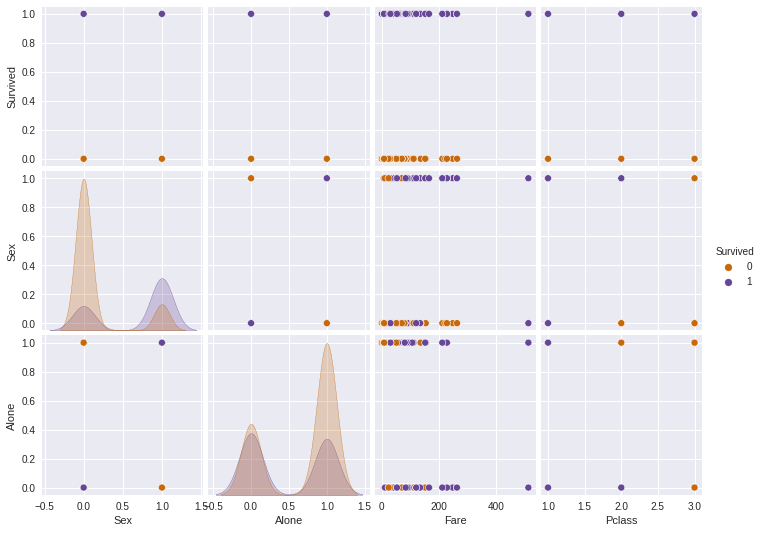

In [33]:
sns.pairplot(df,
             x_vars = [ 'Sex','Alone','Fare', 'Pclass' ],
             y_vars = [ 'Survived','Sex','Alone'],
       diag_kind='kde', hue='Survived'
             )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


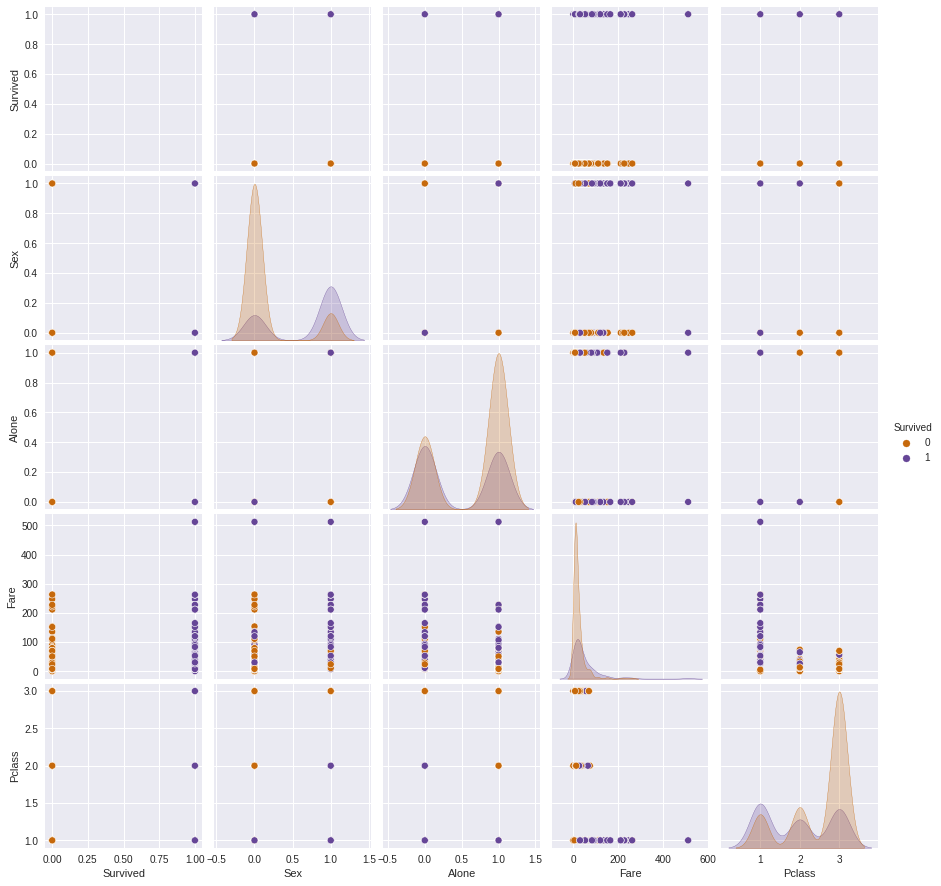

In [34]:
sns.pairplot(df,
             x_vars = [ 'Survived','Sex','Alone','Fare', 'Pclass' ],
             y_vars = [ 'Survived','Sex','Alone','Fare', 'Pclass'],
       diag_kind='kde', hue='Survived'
             )

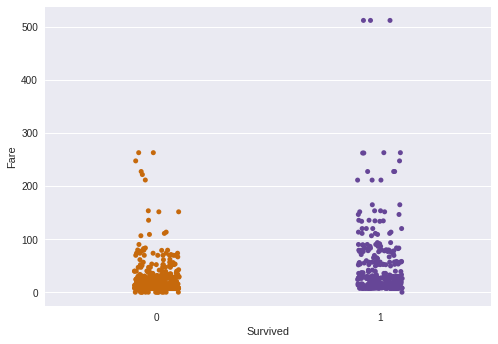

In [35]:
sns.stripplot(y='Fare', x='Survived', data=df)

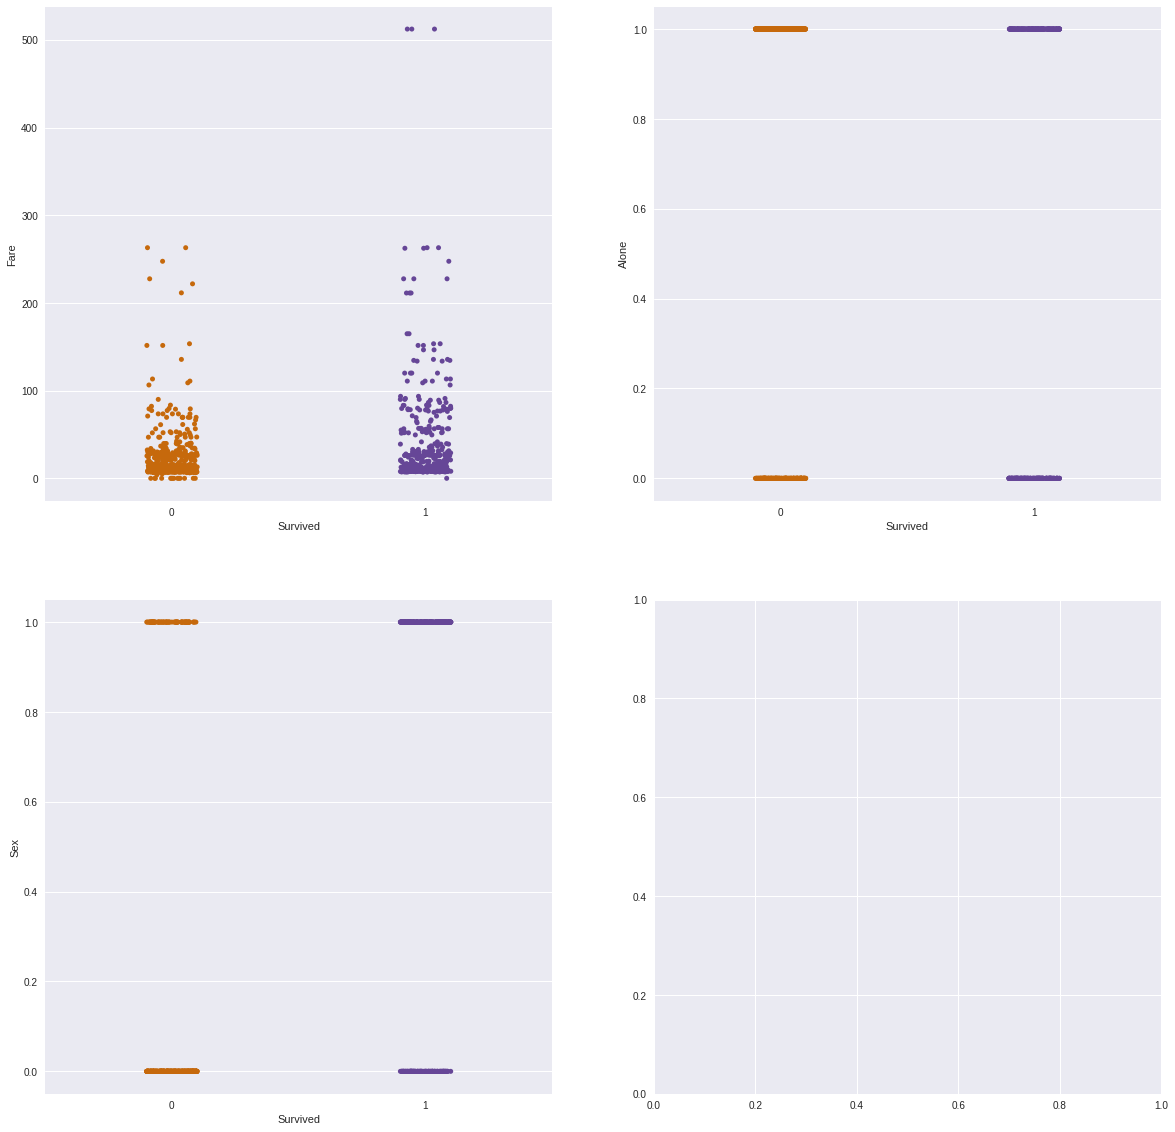

In [37]:
fig, axarr = plt.subplots(2,2, figsize=(20,20))

#three rows and 2 columns all starting from (0,0)

sns.stripplot(y='Fare', x='Survived', data=df, hue=None, ax=axarr[0][0])
sns.stripplot(y='Sex', x='Survived', data=df, hue=None, ax=axarr[1][0])
sns.stripplot(y='Alone', x='Survived', data=df, hue=None, ax=axarr[0][1])

In [38]:
uniMathData = df[['Fare', 'Survived']]

uniMathData.head(5)

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0


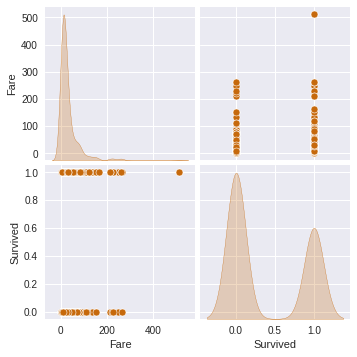

In [39]:
sns.pairplot(df,
             x_vars = ['Fare', 'Survived'],
             y_vars =  ['Fare', 'Survived'],
             
       diag_kind='kde')

In [40]:
uniMathData.to_csv('univariate_MathData_2.csv')  #saving uniMathData in csv format on drive

**Conclusion:**





*   Female are getting priority over male.
*   People form rich family will have high chances of survival.
*   Passanger with family have high rate of surviving.
*   Passanger who board ship at Cherbourg, survived more in proportion than others.


